27


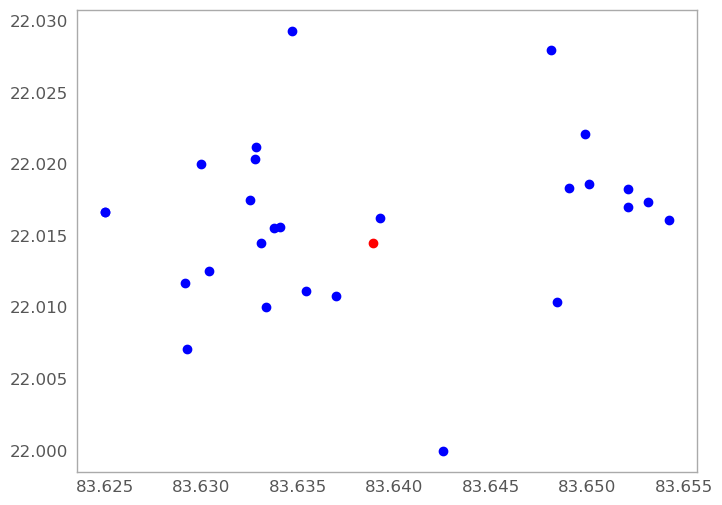

In [50]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u

import matplotlib.pyplot as plt

Simbad.reset_votable_fields()
Simbad.add_votable_fields('otype')

galactic_coords = SkyCoord(l=133.6, b=-37.7, unit=(u.deg, u.deg), frame='galactic')
m51_coords = SkyCoord(ra="13h 29m 52.7s", dec="+47d 11m 42s", frame="icrs")

m1_coords = SkyCoord(ra=83.63888889, dec=22.01444444, unit='deg', frame='icrs')
# m1_coords = SkyCoord(ra="5h 34m 32s", dec="+22d 0m 52s", frame="icrs")


result = Simbad.query_region(m1_coords, radius = 1 * u.arcmin)
result.sort("OTYPE")


num = 0
for r in result:
    # if("SNRemnant" in r["OTYPE"]):
        # print(r["MAIN_ID", "RA", "DEC", "OTYPE"])
        num += 1
print(num)        
        
    

plt.plot(m1_coords.ra, m1_coords.dec, 'ro')




ra_hms = result['RA']
dec_dms = result['DEC']

new_coords = SkyCoord(ra=ra_hms, dec=dec_dms, unit=(u.hourangle, u.deg))

plt.plot(new_coords.ra, new_coords.dec, 'bo')
# plt.plot(result["RA"], result["DEC"])
plt.grid()
plt.show()

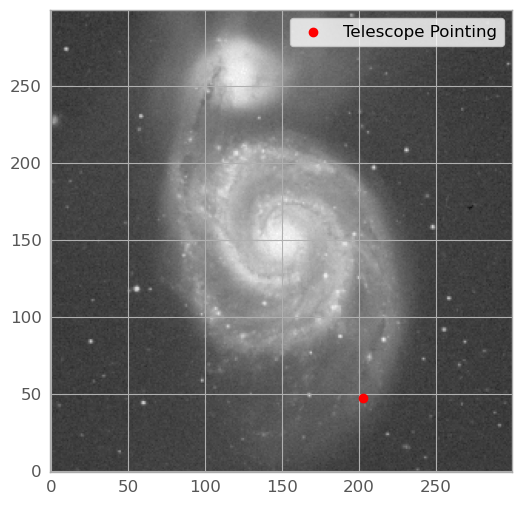

In [48]:
from astroquery.skyview import SkyView

# pointing = SkyCoord(ra=83.63888889, dec=22.01444444, unit='deg', frame='icrs')
pointing = SkyCoord(ra="13h 29m 52.7s", dec="+47d 11m 42s", frame="icrs")

ra = 202.469575
dec = 47.1952583
pointing = SkyCoord(ra=ra, dec=dec, frame="icrs", unit="deg")

# pointing = SkyCoord(ra="16h 41m 41s", dec="+36d 27m 35s", frame="icrs")

# pointing = SkyCoord(ra=14.7007994797715, dec=40.1059993464993, frame="icrs", unit="deg")
# Query DSS for an image around your coordinates
survey = "DSS2 Red"
images = SkyView.get_images(position=pointing, survey=survey, radius=0.1 * u.deg)

hdu = images[0][0]  # First image from DSS

# print(hdu.header)

# Plot the FITS image
from astropy.visualization import simple_norm

norm = simple_norm(hdu.data, 'sqrt')
plt.imshow(hdu.data, cmap='gray', norm=norm, origin='lower')
plt.scatter([pointing.ra.deg], [pointing.dec.deg], color='red', label="Telescope Pointing")
plt.legend()
plt.show()

WCS Information from FITS Header:
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 10.684  41.269  
CRPIX : 150.5  150.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0013333333333333335  0.0013333333333333335  
NAXIS : 300  300
Pixel coordinates [150.5, 150.5] correspond to world coordinates: RA=10.68222602035889, Dec=41.27033331971791


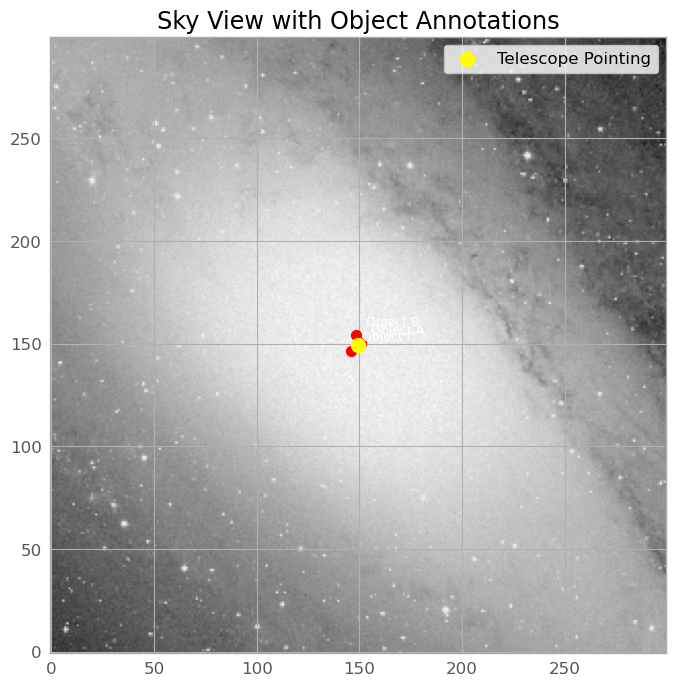

In [45]:
from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
import astropy.units as u
import matplotlib.pyplot as plt


from astropy.io import fits
from astropy.wcs import WCS
from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define telescope pointing
ra = 10.684  # RA in degrees
dec = 41.269  # Dec in degrees
pointing = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')

# Query DSS for an image around your coordinates
survey = "DSS2 Red"
images = SkyView.get_images(position=pointing, survey=survey, radius=0.2 * u.deg)
hdu = images[0][0]  # First HDU (Header Data Unit)

# Create a WCS object from the header
header = hdu.header
wcs = WCS(header)

# Print WCS-related header information
print("WCS Information from FITS Header:")
print(wcs)

# Convert a pixel position to world coordinates (RA/Dec) as a test
pixel_coords = [header['CRPIX1'], header['CRPIX2']]  # Reference pixel
world_coords = wcs.pixel_to_world(pixel_coords[0], pixel_coords[1])
print(f"Pixel coordinates {pixel_coords} correspond to world coordinates: RA={world_coords.ra.deg}, Dec={world_coords.dec.deg}")

# Define telescope pointing and object names
ra = 10.684  # RA in degrees
dec = 41.269  # Dec in degrees
pointing = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')

# Query DSS for an image around your coordinates
survey = "DSS2 Red"
images = SkyView.get_images(position=pointing, survey=survey, radius=0.2 * u.deg)
hdu = images[0][0]  # First image from DSS

# Example: List of nearby objects with names
object_coords = SkyCoord(
    ra=[10.682, 10.686, 10.690] * u.deg,  # Example RA values
    dec=[41.270, 41.275, 41.265] * u.deg,  # Example Dec values
    frame='icrs'
)
object_names = ["Object A", "Object B", "Object C"]

# Plot the FITS image
fig, ax = plt.subplots(figsize=(8, 8))
norm = simple_norm(hdu.data, 'sqrt')
ax.imshow(hdu.data, cmap='gray', norm=norm, origin='lower')

# Convert coordinates to pixel values
# wcs = hdu.wcs  # If your FITS file includes WCS info
x_pixel, y_pixel = wcs.world_to_pixel(object_coords)

# Annotate object names
for x, y, name in zip(x_pixel, y_pixel, object_names):
    ax.scatter(x, y, color='red', s=50)  # Plot object position
    ax.text(x + 5, y + 5, name, color='white', fontsize=9)  # Add label slightly offset

# Highlight telescope pointing
x_point, y_point = wcs.world_to_pixel(pointing)
ax.scatter(x_point, y_point, color='yellow', label="Telescope Pointing", s=100)

# Add legend and labels
ax.legend()
plt.title("Sky View with Object Annotations")
plt.show()